<a href="https://colab.research.google.com/github/Akihide0517/publicPrograms/blob/main/%E5%A3%B2%E3%82%8A%E4%B8%8A%E3%81%92%E4%BA%88%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Pythonで実行時のwarningsが出てこないようにします
import warnings
warnings.filterwarnings("ignore")


In [6]:
#一行目の()の内容は、各々のデータの格納先によって変わるのでご注意下さい。
#大文字小文字など、完璧に一致していなければエラーが出ます。

df = pd.read_csv("salesdata.csv")

df.head()


,Invoice No,Part No,Description,Invoice Date,User Type,Order Qty,Ship Qty,B/O,Unit Price,Extended price,...,Margin % (Current),Discount,Territory,Salesperson,Salesperson Name,Currency,Product Code,Ship Date,Required Date,Warehouse
0,1000586939,DU2489_L,adidas Boy's Club 3 Stripe Short (White/Black),2020/09/21,NaN,1,1,0,43.95,43.95,...,57.0,0,1.0,9,Amazon.ca,NaN,BSL,NaN,2020/09/21,1
1,1000588242,FK7146_M,adidas Girl's Club Skirt (Black/Silver/White),2020/09/25,NaN,1,1,0,43.95,43.95,...,57.0,0,1.0,9,Amazon.ca,NaN,GSKM,2020/09/25,2020/09/25,1
2,1000583557,DU0874_M,adidas Men's Club 3 Stripe 9 Inch Shorts (Blac...,2020/09/11,NaN,1,1,0,45.95,45.95,...,44.0,0,1.0,9,Amazon.ca,NaN,MTM,NaN,2020/09/11,1
3,1000581330,DP0302_M,adidas Men's Club 3 Stripe 9 Inch Shorts (Whit...,2020/09/07,NaN,1,1,0,45.95,45.95,...,44.0,0,1.0,9,Amazon.ca,NaN,MTM,NaN,2020/09/07,1
4,1000582903,2041A073-418_M,Asics Men's Club 7 Inch Shorts (Blue),2020/09/11,NaN,1,1,0,87.95,87.95,...,72.0,0,1.0,9,Amazon.ca,NaN,MSM,2020/09/11,2020/09/11,1


In [8]:
df.columns


Index(['Invoice No', 'Part No', 'Description', 'Invoice Date', 'User Type',
       'Order Qty', 'Ship Qty', 'B/O', 'Unit Price', 'Extended price', 'U/M',
       'Tax 01', 'Tax 02', 'Unit Cost (Average)', 'Margin % (Average)',
       'Unit Cost (Current)', 'Margin % (Current)', 'Discount', 'Territory',
       'Salesperson', 'Salesperson Name', 'Currency', 'Product Code',
       'Ship Date', 'Required Date', 'Warehouse'],
      dtype='object')

In [9]:
df[df.duplicated()]


,Invoice No,Part No,Description,Invoice Date,User Type,Order Qty,Ship Qty,B/O,Unit Price,Extended price,...,Margin % (Current),Discount,Territory,Salesperson,Salesperson Name,Currency,Product Code,Ship Date,Required Date,Warehouse


In [10]:
df_nulls = df[df.isnull().apply(lambda x: max(x), axis=1)]
df_nulls.head()


,Invoice No,Part No,Description,Invoice Date,User Type,Order Qty,Ship Qty,B/O,Unit Price,Extended price,...,Margin % (Current),Discount,Territory,Salesperson,Salesperson Name,Currency,Product Code,Ship Date,Required Date,Warehouse
0,1000586939,DU2489_L,adidas Boy's Club 3 Stripe Short (White/Black),2020/09/21,NaN,1,1,0,43.95,43.95,...,57.0,0,1.0,9,Amazon.ca,NaN,BSL,NaN,2020/09/21,1
1,1000588242,FK7146_M,adidas Girl's Club Skirt (Black/Silver/White),2020/09/25,NaN,1,1,0,43.95,43.95,...,57.0,0,1.0,9,Amazon.ca,NaN,GSKM,2020/09/25,2020/09/25,1
2,1000583557,DU0874_M,adidas Men's Club 3 Stripe 9 Inch Shorts (Blac...,2020/09/11,NaN,1,1,0,45.95,45.95,...,44.0,0,1.0,9,Amazon.ca,NaN,MTM,NaN,2020/09/11,1
3,1000581330,DP0302_M,adidas Men's Club 3 Stripe 9 Inch Shorts (Whit...,2020/09/07,NaN,1,1,0,45.95,45.95,...,44.0,0,1.0,9,Amazon.ca,NaN,MTM,NaN,2020/09/07,1
4,1000582903,2041A073-418_M,Asics Men's Club 7 Inch Shorts (Blue),2020/09/11,NaN,1,1,0,87.95,87.95,...,72.0,0,1.0,9,Amazon.ca,NaN,MSM,2020/09/11,2020/09/11,1


In [11]:
df['User Type'] = df['User Type'].fillna(0)
df['Description'] = df['Description'].fillna(0)
df['Margin % (Average)'] = df['Margin % (Average)'].fillna(0)
df['Margin % (Current)'] = df['Margin % (Current)'].fillna(0)
df['Currency'] = df['Currency'].fillna('USD')
df['Ship Date'] = df['Ship Date'].fillna(0)
df['Territory'] = df['Territory'].fillna(0)


df_nulls = df[df.isnull().apply(lambda x: max(x), axis=1)]
df_nulls.head()


,Invoice No,Part No,Description,Invoice Date,User Type,Order Qty,Ship Qty,B/O,Unit Price,Extended price,...,Margin % (Current),Discount,Territory,Salesperson,Salesperson Name,Currency,Product Code,Ship Date,Required Date,Warehouse


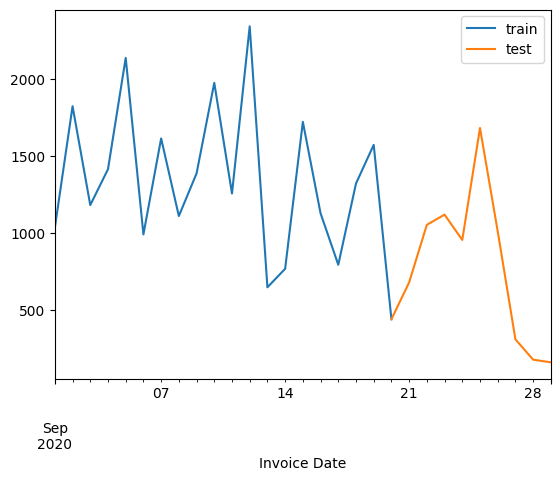

In [12]:
import os

#pandasにデータを変換する
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

#set_indexを使って'invoice data'の列を作る
df.set_index('Invoice Date',inplace=True)




#Unit Priceの合計（sum）を1日ごと（1D）にリサンプリングする
dfd = df["2020-09-01":].resample('1D').sum()[["Unit Price"]]

#testとtrainデータを分ける
train = dfd["2020-09-01":"2020-09-20"]
test = dfd["2020-09-20":]



ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])


In [13]:
#min-max scalingを適応させる
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]


In [14]:
#モデルの作成（Kerasでは、Sequentialという箱を用意して、そこに深層学習（ディープラーニング）のネットワーク層を追加していきます。

from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, GRU

K.clear_session()

model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(1))
#↑これが、1つのネットワーク層を表します。
#Denseというのは、入力と出力を全て接続するネットワークです。上記の場合、出力が1となります。
model.compile(loss='mean_squared_error', optimizer='adam')

early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

#モデルの学習
model.fit(X_train, y_train,
          epochs=10, # 訓練データを繰り返し学習させる数
          batch_size=5, # 訓練データを10ずつのデータに分けて学習させる
          verbose=1,
          callbacks=[early_stop])

#予測値を出す
y_pred_fc = model.predict(X_test)

lstm_units = 6
#LSTM Network w/6 units（出力の数）
X_train_t = X_train[:, None]
X_test_t = X_test[:, None]

K.clear_session()
model = Sequential()

model.add(LSTM(6, input_shape=(1, 1)))
#input_shape/最初の層の時だけ指定。入力層の形を指定。

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_t, y_train,
         epochs=8, batch_size=5, verbose=1,
         callbacks=[early_stop])

y_pred_lstm = model.predict(X_test_t)

gru_units = 5
#GRU w/ 5 units（出力の数）
K.clear_session()
model = Sequential()

model.add(GRU(6, input_shape=(1, 1)))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_t, y_train,
         epochs=8, batch_size=5, verbose=1,
         callbacks=[early_stop])

y_pred_gru = model.predict(X_test_t)


Epoch 1/10
4/4 [==============================] - 1s 5ms/step - loss: 0.1833
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1778
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1715
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.1660
Epoch 5/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1604
Epoch 6/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1554
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1510
Epoch 8/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1478
Epoch 9/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1426
Epoch 10/10
1/1 [==============================] - 0s 79ms/step
Epoch 1/8
4/4 [==============================] - 2s 6ms/step - loss: 0.3398
Epoch 2/8
4/4 [==============================] - 0s 4ms/step - loss: 0.3304
Epoch 3/8
4/4 [==============================] - 0s 4ms/step - loss: 0.3203
Epoch 4/8
4/4 [

<Axes: xlabel='Invoice Date'>

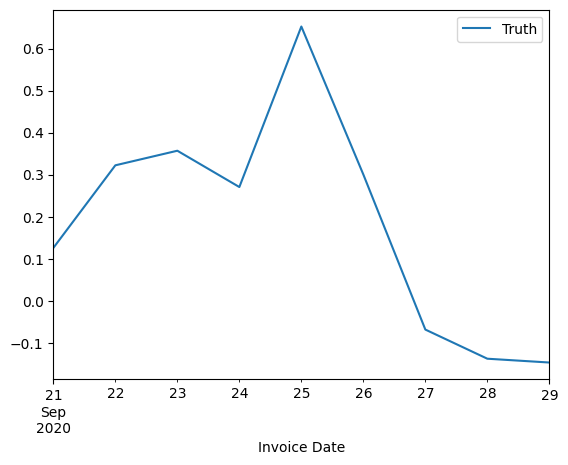

In [16]:
pd.DataFrame(
    {'Truth': sum(y_test.tolist(),[])
     },index = test[1:].index).plot()


In [ ]:
#次のサイトを参照 https://axross-recipe.com/recipes/189#exams